<a href="https://colab.research.google.com/github/Smihoubi/TEST/blob/master/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip3 install torch torchvision
!pip3 install pandas
!mkdir -p drive



In [0]:
from numpy import mean
from numpy import std
from numpy import dstack
import pandas as pd
import numpy as np
from numpy import mean
from numpy import std
from numpy import dstack
from pandas import read_csv
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import LSTM
from keras.optimizers import SGD
from keras.layers import TimeDistributed
from keras.layers import ConvLSTM2D
from keras.utils import to_categorical
from sklearn.preprocessing import MinMaxScaler
from keras.utils.vis_utils import plot_model

import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [26]:

#load and concatenate all dev test or train element of a feature
def load_feature(FTypeIndex,FNameIndex,Suffixe="",sep=","):#element index among features, and types
  dataframes = pd.DataFrame()
  for i in range(1,10):#(1,10):#9 elements for all feature name
    filepath="/content/gdrive/My Drive/MLearning/AVEC2015/"+features[FTypeIndex]+"/"+types[FNameIndex]+"_"+str(i)+Suffixe+".csv"
    dataframe = pd.read_csv(filepath,sep=sep)
    dataframe=dataframe.iloc[:, 2:dataframe.shape[1]]#remove element name and time
    dataframes=pd.concat([dataframes, dataframe])
    #print(np.shape(dataframes.values))
  return np.asarray(dataframes.values, dtype=np.float32)

#formate data as [samples, timesteps, features]
def formate_timeStep3D(FTypeIndex,FNameIndex,scale=True,Suffixe="",sep=","):
  dataframe=load_feature(FTypeIndex,FNameIndex,Suffixe,sep)
  if(scale): 
    scaleData(dataframe)
  formated_data=[]
  overlap=2
  begin=0
  end=6#time step(frames)
  while (end<np.shape(dataframe)[0]):
    formated_data.append(dataframe[:][begin:end])
    begin=begin+overlap
    end=end+overlap
  return np.asarray(formated_data, dtype=np.float32)#

#load and formate rating gold data as [samples, timesteps, class]
def load_Rating_Gold(FeatureNameIndex):
  y_arousal=formate_timeStep3D(5,FeatureNameIndex,False,'_arousal',";")
  #y_valence=load_feature(5,FeatureNameIndex,'_valence',";")
  #y_data=np.concatenate((y_arousal,y_valence), axis=1)
  return y_arousal


def scaleData(data):
  scaler = MinMaxScaler(feature_range=(0, 1))
  scaler.fit(data)
  data=scaler.transform(data)
  return data



features=['features_audio','Face_BoundingBox','features_ecg','features_eda',
'Landmark_Points','Ratings_Gold']
types=['train','dev','test']
trainX=formate_timeStep3D(2,0)#read and format train data
testX=formate_timeStep3D(2,1)#read and format dev data
print(trainX.shape)
print(testX.shape)

trainy=np.squeeze(load_Rating_Gold(0), axis=2)
testy=np.squeeze(load_Rating_Gold(1), axis=2)
print(trainy.shape)
print(testy.shape)



(33752, 6, 54)
(33752, 6, 54)


ValueError: ignored

In [0]:

def display_history(history):
  # list all data in history
  print(history.history.keys())
  #summarize history for accuracy
  plt.plot(history.history['acc'])
  plt.plot(history.history['val_acc'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()
  # summarize history for loss
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()


In [0]:
# fit and evaluate a model
def evaluate_model(trainX, trainy, testX, testy):
  verbose, epochs, batch_size = 1, 100, 128
  n_timesteps, n_features, n_outputs = np.shape(trainX)[1],  np.shape(trainX)[2],  np.shape(trainy)[1]
  model = Sequential()
  model.add(LSTM(50, input_shape=(n_timesteps,n_features)))
  model.add(Dropout(0.5))
  model.add(Dense(100, activation='relu'))
  model.add(Dense(n_outputs, activation='tanh'))
  model.compile(loss='mean_squared_error', optimizer=SGD(lr=0.01, decay=0, momentum=0.9, nesterov=True), metrics=['accuracy'])
  plot_model(model, to_file='model_plot.png',show_shapes=True)
  #model.summary()
  #history =model.fit(trainX, trainy, epochs=epochs, batch_size=batch_size, verbose=verbose)
  history =model.fit(trainX, trainy, epochs=epochs, batch_size=batch_size, verbose=verbose,validation_data=(testX, testy))
  display_history(history) 
  # evaluate model
  _, accuracy = model.evaluate(testX, testy, batch_size=batch_size, verbose=0)
  return accuracy

Train on 33752 samples, validate on 33752 samples
Epoch 1/100
33752/33752 [==============================] - 10s 286us/step - loss: 0.0369 - acc: 0.1875 - val_loss: 0.0433 - val_acc: 0.2282
Epoch 2/100
33752/33752 [==============================] - 4s 111us/step - loss: 0.0329 - acc: 0.2092 - val_loss: 0.0430 - val_acc: 0.2331
Epoch 3/100
33752/33752 [==============================] - 4s 111us/step - loss: 0.0327 - acc: 0.1674 - val_loss: 0.0449 - val_acc: 0.2355
Epoch 4/100
33752/33752 [==============================] - 4s 110us/step - loss: 0.0320 - acc: 0.1982 - val_loss: 0.0428 - val_acc: 0.2297
Epoch 5/100
33752/33752 [==============================] - 4s 111us/step - loss: 0.0316 - acc: 0.1889 - val_loss: 0.0448 - val_acc: 0.2348
Epoch 6/100
33752/33752 [==============================] - 4s 110us/step - loss: 0.0315 - acc: 0.1896 - val_loss: 0.0463 - val_acc: 0.2362
Epoch 7/100
33752/33752 [==============================] - 4s 111us/step - loss: 0.0315 - acc: 0.1888 - val_loss: 0

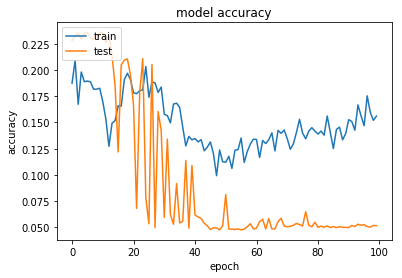

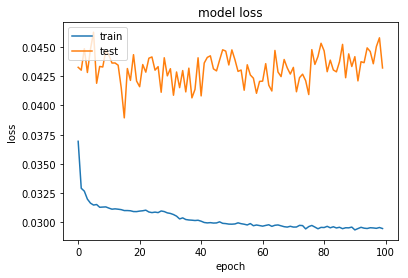

>#1: 5.149
Train on 33752 samples, validate on 33752 samples
Epoch 1/100
33752/33752 [==============================] - 10s 289us/step - loss: 0.0446 - acc: 0.1753 - val_loss: 0.0434 - val_acc: 0.0411
Epoch 2/100
33752/33752 [==============================] - 4s 112us/step - loss: 0.0354 - acc: 0.1811 - val_loss: 0.0433 - val_acc: 0.0411
Epoch 3/100
33752/33752 [==============================] - 4s 112us/step - loss: 0.0345 - acc: 0.1742 - val_loss: 0.0440 - val_acc: 0.0411
Epoch 4/100
33752/33752 [==============================] - 4s 112us/step - loss: 0.0341 - acc: 0.1758 - val_loss: 0.0468 - val_acc: 0.0410
Epoch 5/100
33752/33752 [==============================] - 4s 112us/step - loss: 0.0338 - acc: 0.1759 - val_loss: 0.0437 - val_acc: 0.0410
Epoch 6/100
33752/33752 [==============================] - 4s 111us/step - loss: 0.0336 - acc: 0.1736 - val_loss: 0.0437 - val_acc: 0.0410
Epoch 7/100
33752/33752 [==============================] - 4s 111us/step - loss: 0.0335 - acc: 0.1692 - 

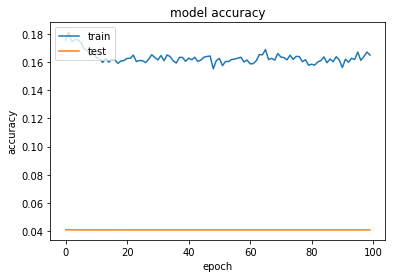

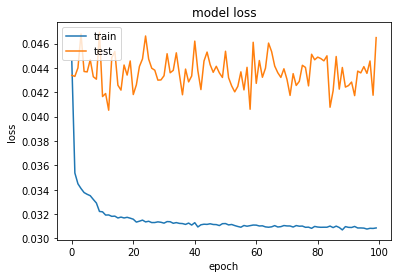

>#2: 4.100
Train on 33752 samples, validate on 33752 samples
Epoch 1/100
33752/33752 [==============================] - 10s 293us/step - loss: 0.0436 - acc: 0.1377 - val_loss: 0.0430 - val_acc: 0.2098
Epoch 2/100
33752/33752 [==============================] - 4s 112us/step - loss: 0.0339 - acc: 0.1525 - val_loss: 0.0426 - val_acc: 0.1900
Epoch 3/100
33752/33752 [==============================] - 4s 112us/step - loss: 0.0329 - acc: 0.1699 - val_loss: 0.0425 - val_acc: 0.1813
Epoch 4/100
33752/33752 [==============================] - 4s 113us/step - loss: 0.0325 - acc: 0.1721 - val_loss: 0.0414 - val_acc: 0.1392
Epoch 5/100
33752/33752 [==============================] - 4s 112us/step - loss: 0.0322 - acc: 0.1686 - val_loss: 0.0446 - val_acc: 0.2019
Epoch 6/100
33752/33752 [==============================] - 4s 112us/step - loss: 0.0321 - acc: 0.1648 - val_loss: 0.0412 - val_acc: 0.1256
Epoch 7/100
33752/33752 [==============================] - 4s 112us/step - loss: 0.0329 - acc: 0.1614 - 

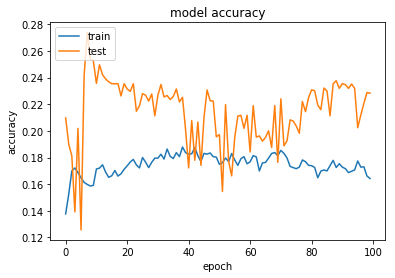

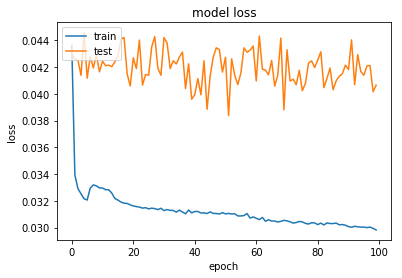

>#3: 22.831
Train on 33752 samples, validate on 33752 samples
Epoch 1/100
33752/33752 [==============================] - 10s 300us/step - loss: 0.0465 - acc: 0.1634 - val_loss: 0.0456 - val_acc: 0.0752
Epoch 2/100
33752/33752 [==============================] - 4s 114us/step - loss: 0.0360 - acc: 0.1597 - val_loss: 0.0449 - val_acc: 0.0752
Epoch 3/100
33752/33752 [==============================] - 4s 111us/step - loss: 0.0348 - acc: 0.1604 - val_loss: 0.0441 - val_acc: 0.0752
Epoch 4/100
33752/33752 [==============================] - 4s 113us/step - loss: 0.0343 - acc: 0.1603 - val_loss: 0.0450 - val_acc: 0.0752
Epoch 5/100
26880/33752 [======================>.......] - ETA: 0s - loss: 0.0340 - acc: 0.1657

In [0]:
# summarize scores
def summarize_results(scores):
	print(scores)
	m, s = mean(scores), std(scores)
	print('Accuracy: %.3f%% (+/-%.3f)' % (m, s))
  
scores = list()
for r in range(10):
		score = evaluate_model(trainX, trainy, testX, testy)
		score = score * 100.0
		print('>#%d: %.3f' % (r+1, score))
		scores.append(score)
summarize_results(scores)

Train the modele
